In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('Datasets_Zrive/feature_frame.csv')


### Data Types and Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [3]:
df['created_at'] = pd.to_datetime(df['created_at']) 
df['order_date'] = pd.to_datetime(df['order_date']) 

In [4]:
print(len(df.columns))
list_columns = df.columns.to_list()
list_columns.remove('variant_id')
list_columns.remove('outcome')
list_columns.remove('vendor')
list_columns.remove('product_type')

27


### Distributions

In [5]:
df.outcome.value_counts()/len(df)

outcome
0.0    0.988463
1.0    0.011537
Name: count, dtype: float64

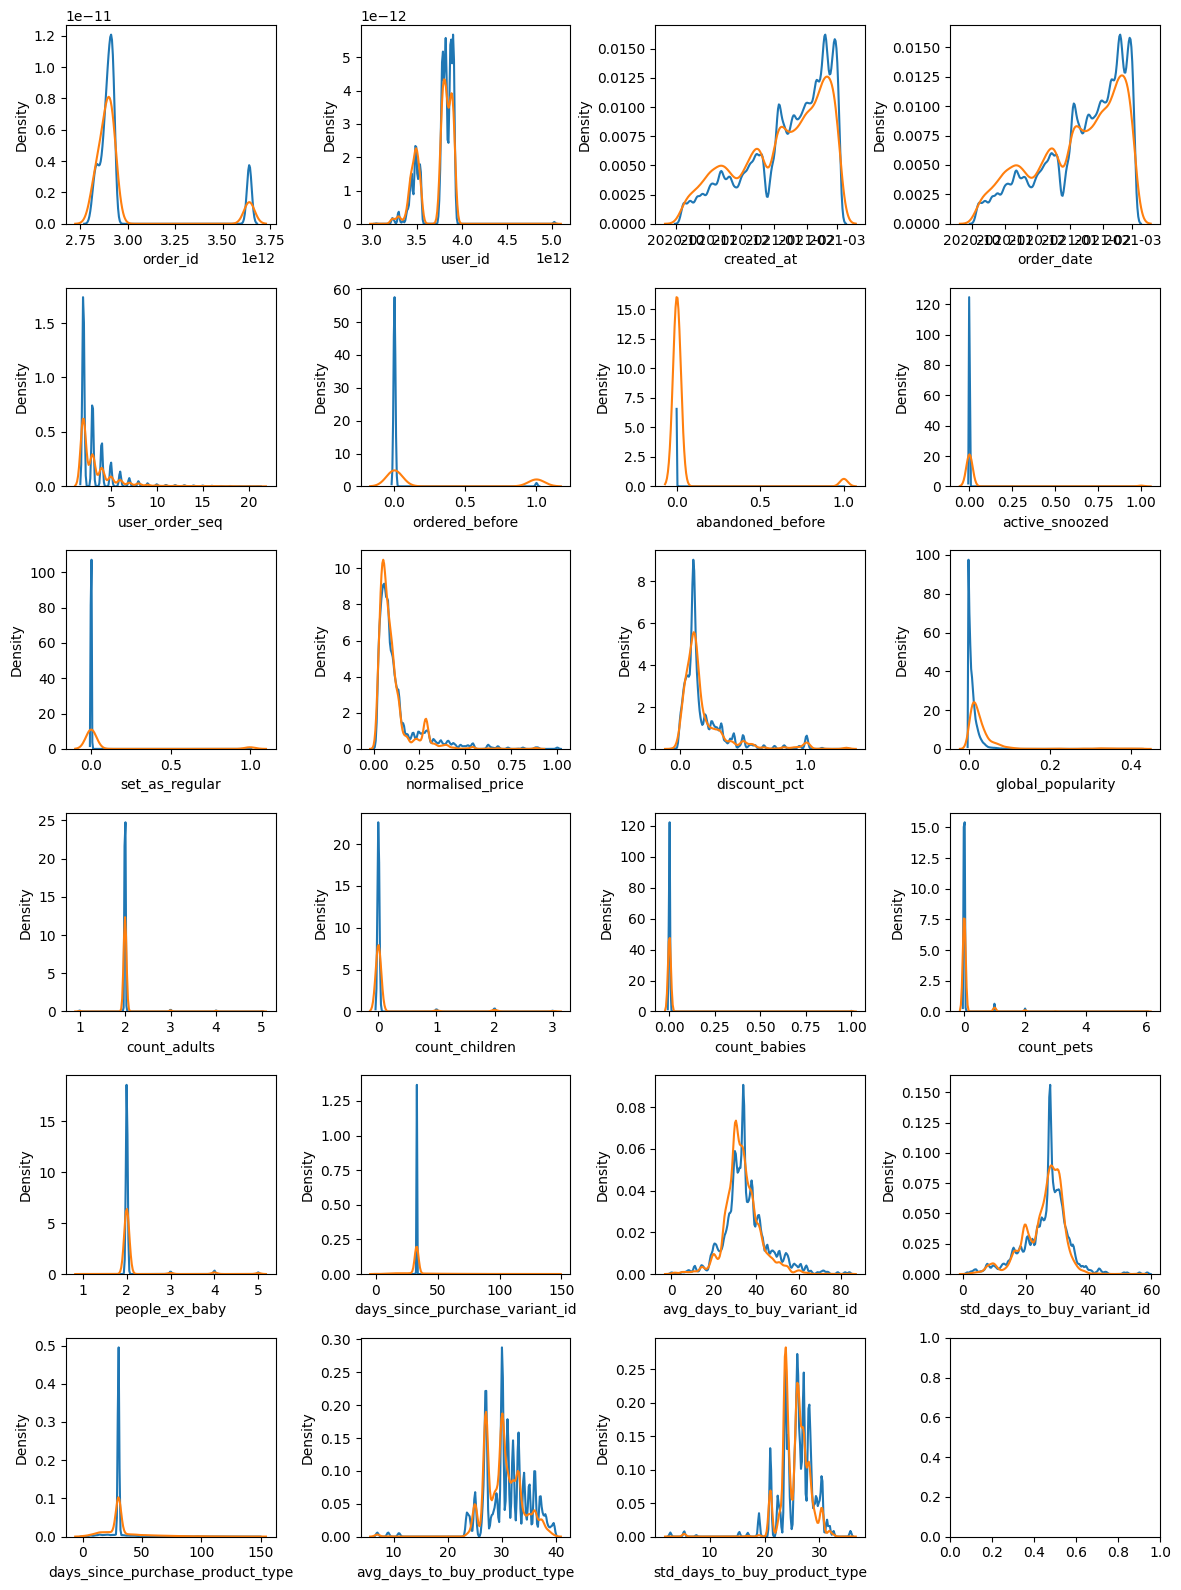

In [6]:

fig, axes = plt.subplots(6, 4, figsize=(12, 16))
axes = axes.flatten()

warnings.filterwarnings("ignore")

for index, feature in enumerate(list_columns):
    ax = axes[index]
    for outcome_value in [0, 1]:
        sns.kdeplot(data=df[df['outcome'] == outcome_value], x=feature, ax=ax, label=f'Outcome {outcome_value}')

plt.tight_layout()
plt.show()

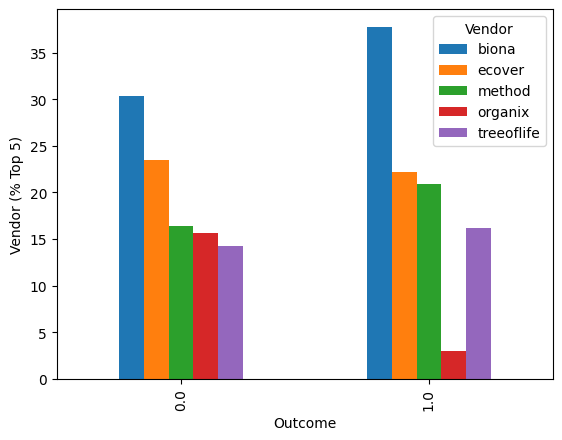

In [7]:
top_values = df.vendor.value_counts().head(5).index.tolist()
top_dataset = df[df['vendor'].isin(top_values)]
cross_tab = pd.crosstab(top_dataset['outcome'], top_dataset['vendor'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
cross_tab_percentage.plot(kind='bar', stacked=False)
plt.xlabel('Outcome')
plt.ylabel('Vendor (% Top 5)')
plt.legend(title='Vendor', loc='upper right')
plt.show()

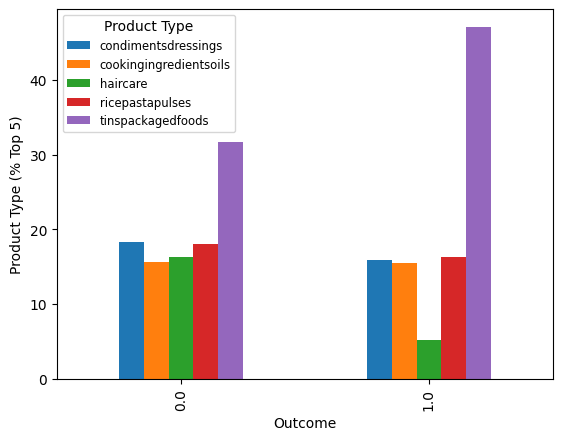

In [8]:
top_values = df.product_type.value_counts().head(5).index.tolist()
top_dataset = df[df['product_type'].isin(top_values)]
cross_tab = pd.crosstab(top_dataset['outcome'], top_dataset['product_type'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Create a grouped bar plot
cross_tab_percentage.plot(kind='bar', stacked=False)
plt.xlabel('Outcome')
plt.ylabel('Product Type (% Top 5)')
plt.legend(title='Product Type', loc='upper left', fontsize='small')
plt.show()

### Correlations

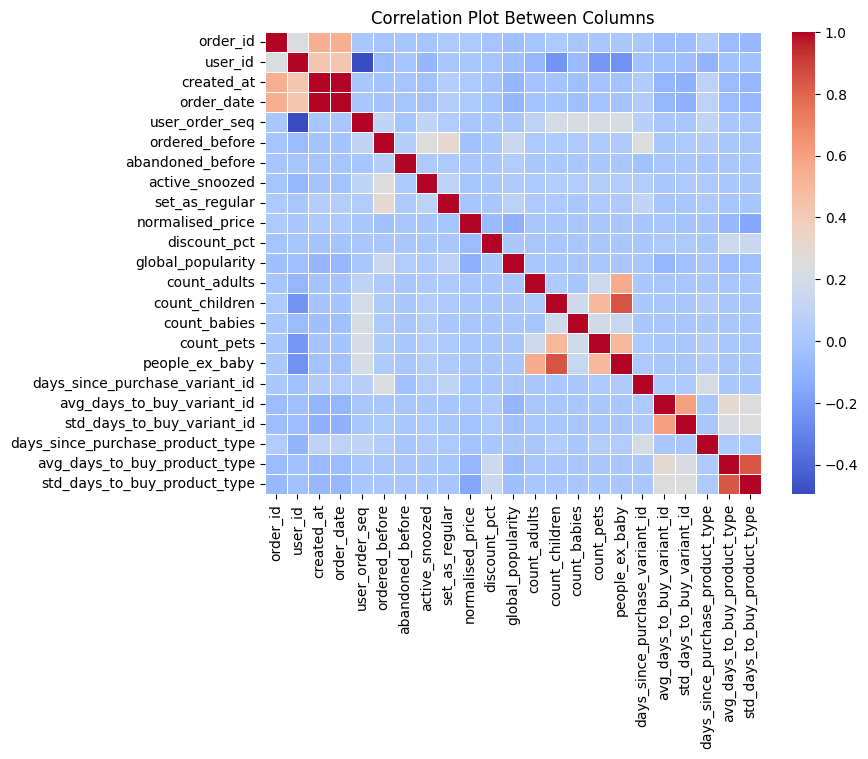

In [9]:
correlation_matrix = df[list_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Correlation Plot Between Columns')
plt.show()

In [10]:
high_correlations = (abs(correlation_matrix)
                     .stack()
                     .sort_values(ascending=False)
                     .reset_index()
                     .rename(columns={0: 'Correlation'})
                     .query('level_0 < level_1'))

print(high_correlations.head())

                         level_0                       level_1  Correlation
24                    created_at                    order_date     0.999987
25                count_children                people_ex_baby     0.846752
27  avg_days_to_buy_product_type  std_days_to_buy_product_type     0.839710
29    avg_days_to_buy_variant_id    std_days_to_buy_variant_id     0.599830
31                  count_adults                people_ex_baby     0.557051


Checking the variables with the highest correlation

<Axes: xlabel='created_at', ylabel='order_date'>

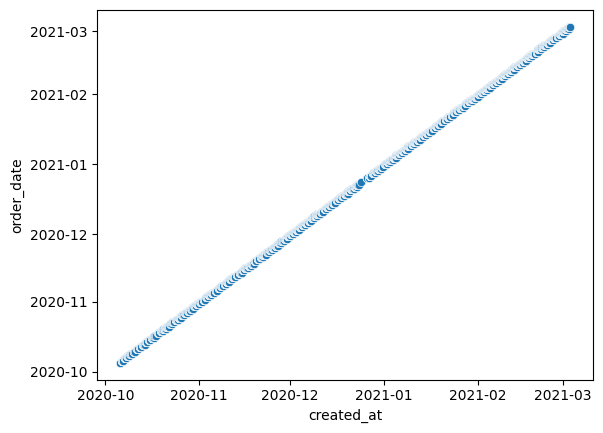

In [12]:
sns.scatterplot(x='created_at', y='order_date', data=df)

<Axes: xlabel='count_children', ylabel='people_ex_baby'>

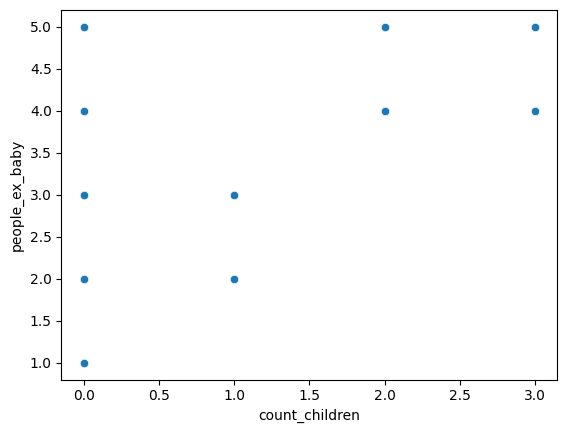

In [14]:
sns.scatterplot(x='count_children', y='people_ex_baby', data=df)

<Axes: xlabel='avg_days_to_buy_product_type', ylabel='std_days_to_buy_product_type'>

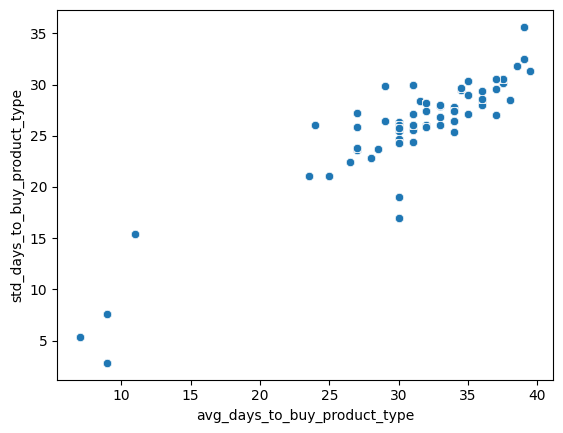

In [15]:
sns.scatterplot(x='avg_days_to_buy_product_type', y='std_days_to_buy_product_type', data=df)

Based on this, I would definitely drop created_at or order_date. I would keep the rest of the predictors if my plan is to train models now. 